In [1]:
using DataFrames, CSV, SparseArrays, LinearAlgebra
include("../Code/Mixing/Mixing.jl")


Main.Mixing

In [2]:
using Plots

In [66]:
p613test = CSV.read("../Datasets/MQLib/g000002.txt"
, header=2, DataFrame, delim=" ");

samplemaxcut =  CSV.read("../Datasets/MQLib/sampleMaxCut.txt"
, header=4, DataFrame, delim=" ");

┌ Warning: thread = 1 warning: only found 2 / 9 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV /Users/j/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 3 / 9 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV /Users/j/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 3 / 9 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV /Users/j/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 3 / 9 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV /Users/j/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 3 / 9 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV /Users/j/.julia/packages/CSV/OnldF/src/file.jl:577
┌ Warning: thread = 1 warning: only found 3 / 9 columns around data row: 6. Filling remaining columns with `missing`
└ @

In [67]:
samplemaxcut

Row,#,Edge,"(a,",b),with,a,<,b,and,weight,w_{ab},encoded,as:,a_1,b_1,w_{ab}_1
,Int64,Int64,Int64?,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
1,3,2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,1,2,3,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,2,3,-2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing


In [68]:
p613test

Row,#,COMMENT:,33D32945,STP,"File,",STP_1,Format,Version,1.0
,Int64,Int64,Int64?,Missing,Missing,Missing,Missing,Missing,Missing
1,200,370,missing,missing,missing,missing,missing,missing,missing
2,1,21,1236,missing,missing,missing,missing,missing,missing
3,1,2,179,missing,missing,missing,missing,missing,missing
4,2,22,1429,missing,missing,missing,missing,missing,missing
5,2,3,1173,missing,missing,missing,missing,missing,missing
6,3,23,325,missing,missing,missing,missing,missing,missing
7,3,4,1261,missing,missing,missing,missing,missing,missing
8,4,24,1140,missing,missing,missing,missing,missing,missing
9,4,5,250,missing,missing,missing,missing,missing,missing


In [83]:
function matrixFromFile(readfile)
    M = zeros(readfile[1,1], readfile[1,1])
    for i in 2:nrow(readfile)
        M[readfile[i,1], readfile[i,2]] = -readfile[i,3]
        M[readfile[i,2], readfile[i,1]] = -readfile[i,3]
    end
    return M
end

matrixFromFile (generic function with 1 method)

In [84]:
matrixFromFile(samplemaxcut)

3×3 Matrix{Float64}:
  0.0  -3.0  0.0
 -3.0   0.0  2.0
  0.0   2.0  0.0

In [85]:
matrixFromFile(p613test)

200×200 Matrix{Float64}:
    0.0   -179.0      0.0      0.0  …     0.0      0.0      0.0      0.0
 -179.0      0.0  -1173.0      0.0        0.0      0.0      0.0      0.0
    0.0  -1173.0      0.0  -1261.0        0.0      0.0      0.0      0.0
    0.0      0.0  -1261.0      0.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0   -250.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0  …     0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0        0.0      0.0      0.0      0.0
    ⋮                               ⋱                            
    0.0      0.0      0.0      0.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.

In [160]:
function testpipeline(testinput)
    testmat = matrixFromFile(testinput)
    sparsetestmat=sparse(testmat)
    @time V = Mixing.randserial(length(sparsetestmat[1,:]), 20, sparsetestmat)
    Cost = tr(V* testmat* V')
  #  a100 = Mixing.assign100(V, sparsetestmat)
    print("Final Cost: ", Cost)#, " Best: ",max(a100...), " Average: ", sum(a100)/100)
end

testpipeline (generic function with 1 method)

In [161]:
V,costs = Mixing.randserial(length(sparse(matrixFromFile(p613test))[1,:]), 20, sparse(matrixFromFile(p613test)), .1, true)

([0.24807020423921183 0.2547242075758677 … 0.22330028341644068 0.22784363507479302; 0.25354059033349746 0.24770648499283773 … 0.1828179369023104 0.17978719377963695; … ; 0.24748059372333364 0.23998996882151538 … 0.3233745480980736 0.3237045863231023; 0.25687706640856106 0.2575110570079515 … 0.22185214782884738 0.21488074987595718], Any[-513084.90512246056, -513269.46689793345, -513578.50290108257, -513804.12853763637, -513974.78262800217, -514235.29216846084, -514365.2429046766, -514514.23801085004, -514814.23400536535, -515095.6403390375  …  -550601.8283182856, -550601.8584162886, -550601.8584162886, -550601.8796248932, -550601.8796248932, -550601.8796248932, -550601.8796248932, -550601.8839852976, -550601.8883559515, -550601.8978606894])

In [162]:
costs[end]

-550601.8978606894

In [163]:
Mixing.assign100(V, (sparse(matrixFromFile(p613test))))

100-element Vector{Any}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [164]:
sign.(rand(20)' * V)

1×200 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

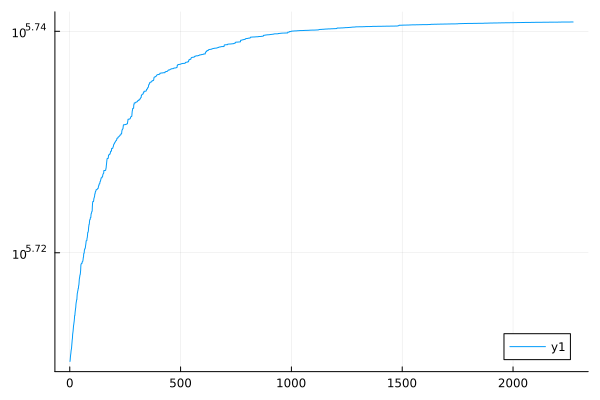

In [165]:
plot(-costs[1:end], yscale=:log10)

In [166]:
costs[end]

-550601.8978606894

In [184]:
testpipeline(p613test)


  0.343184 seconds (225.41 k allocations: 29.511 MiB)
Final Cost: -550906.4546149949

In [181]:
testpipeline(samplemaxcut)

  0.003630 seconds (3.39 k allocations: 453.703 KiB)
Final Cost: -9.999999999999998

In [187]:
function testpipelineparallel(testinput)
    testmat = matrixFromFile(testinput)
    sparsetestmat=sparse(testmat)
    @time V = Mixing.randparallel(length(sparsetestmat[1,:]), 20, sparsetestmat)
    #a100 = Mixing.assign100(V, sparsetestmat)
    #print("Best: ",max(a100...), " Average: ", sum(a100)/100)
    Cost = tr(V* testmat* V')
    print("Final Cost: ", Cost)#, " Best: ",max(a100...), " Average: ", sum(a100)/100)
end

testpipelineparallel (generic function with 1 method)

In [188]:
testpipelineparallel(p613test)

  0.177703 seconds (225.41 k allocations: 29.511 MiB)
Final Cost: -550905.8997316126

In [186]:
Threads.nthreads()

1